In [5]:
import numpy as np
import pandas as pd

def gradient(a, x_data, y_data):
    """
    Compute gradient of the function with respect to 'a'.
    """
    grad_1 = np.sum(2 * x_data**2 * (a[0]*x_data**2 + a[1]*y_data**2 - 1))
    grad_2 = np.sum(2 * y_data**2 * (a[0]*x_data**2 + a[1]*y_data**2 - 1))
    return np.array([grad_1, grad_2])

def gradient_descent(x_data, y_data, initial_a, learning_rate, tolerance, max_iters=10000):
    """
    Perform gradient descent to minimize the objective function.
    """
    a = initial_a
    A = np.column_stack((x_data**2, y_data**2))
    
    # Compute the step size
    mu = 1 / (2 * np.linalg.norm(np.dot(A.T, A), 2))
    
    grad = gradient(a, x_data, y_data)
    iter_count = 0
    
    while np.linalg.norm(grad) > tolerance and iter_count < max_iters:
        a = a - mu * learning_rate * grad
        grad = gradient(a, x_data, y_data)
        iter_count += 1
        
        # Print progress every 100 iterations
        if iter_count % 100 == 0:
            print(f"Iteration {iter_count}: Norm of gradient: {np.linalg.norm(grad)}")
        
    return a

data = pd.read_csv('HW2_ellipse.csv', header=None)
x_data = data[0].values
y_data = data[1].values

initial_a = np.array([1.0, 1.0])
learning_rate = 0.8
tolerance = 1e-5

optimal_a = gradient_descent(x_data, y_data, initial_a, learning_rate, tolerance)
print("Optimal values of a:", optimal_a)

def f(a, x_data, y_data):
    """
    Compute the objective function value.
    """
    return np.sum((a[0]*x_data**2 + a[1]*y_data**2 - 1)**2)

value_f_a = f(optimal_a, x_data, y_data)
print("Value of f(a):", value_f_a)


Iteration 100: Norm of gradient: 1.6512817636818116
Iteration 200: Norm of gradient: 0.015506799326597202
Iteration 300: Norm of gradient: 0.00014562071146864803
Optimal values of a: [0.49992583 1.99820287]
Value of f(a): 0.47825669817131244


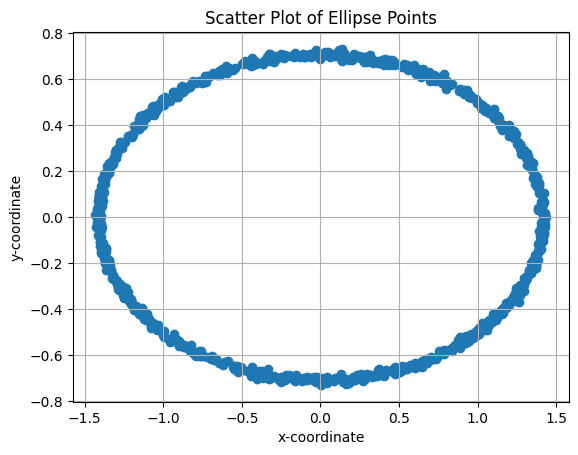

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into a pandas DataFrame
data = pd.read_csv('HW2_ellipse.csv', header=None)

# Use integer-based indexing for columns
plt.scatter(data[0], data[1])
plt.title('Scatter Plot of Ellipse Points')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.grid(True)
plt.show()
